<a href="https://colab.research.google.com/github/Fatehab/machine-learning/blob/main/Publicdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['LC_CTYPE'] = 'en_US.UTF-8'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string
import numpy as np
import spacy 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
#Data Input
path ="/content/drive/MyDrive/smalldata/cybertroll.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,content,annotation,label
0,1,Get fucking real dude.,"{'notes': '', 'label': ['1']}",1
1,2,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",1
2,3,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",1
3,4,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",1
4,5,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",1
...,...,...,...,...
7995,7996,It sucks but at least my car wasn't stolen. ri...,"{'notes': '', 'label': ['0']}",0
7996,7997,It may even suck ass.,"{'notes': '', 'label': ['0']}",0
7997,7998,just because of a dang song. Over it now but d...,"{'notes': '', 'label': ['0']}",0
7998,7999,I dunno I hate it though. Someone at work ga...,"{'notes': '', 'label': ['0']}",0


Number of rows and columns in the dataset: (8000, 4)
Summary statistics of numerical columns:
        Unnamed: 0        label
count  8000.00000  8000.000000
mean   4000.50000     0.500000
std    2309.54541     0.500031
min       1.00000     0.000000
25%    2000.75000     0.000000
50%    4000.50000     0.500000
75%    6000.25000     1.000000
max    8000.00000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8000 non-null   int64 
 1   content     8000 non-null   object
 2   annotation  8000 non-null   object
 3   label       8000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 250.1+ KB
Information about the dataset:
 None
Missing values in each column:
 Unnamed: 0    0
content       0
annotation    0
label         0
dtype: int64
Distribution of labels:
 1    4000
0    4000
Name: label, dtype: int64
Most freque

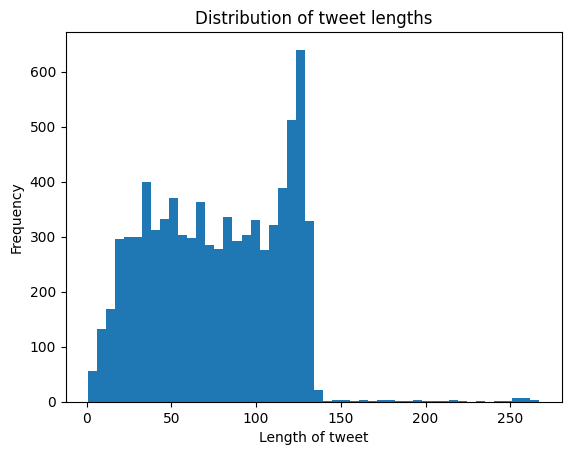

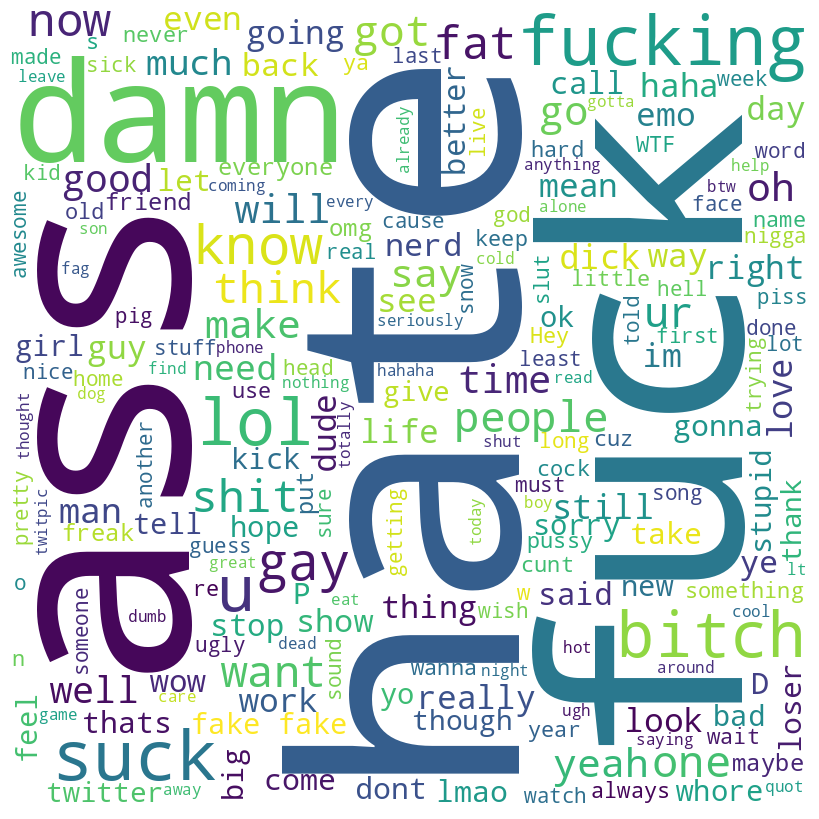

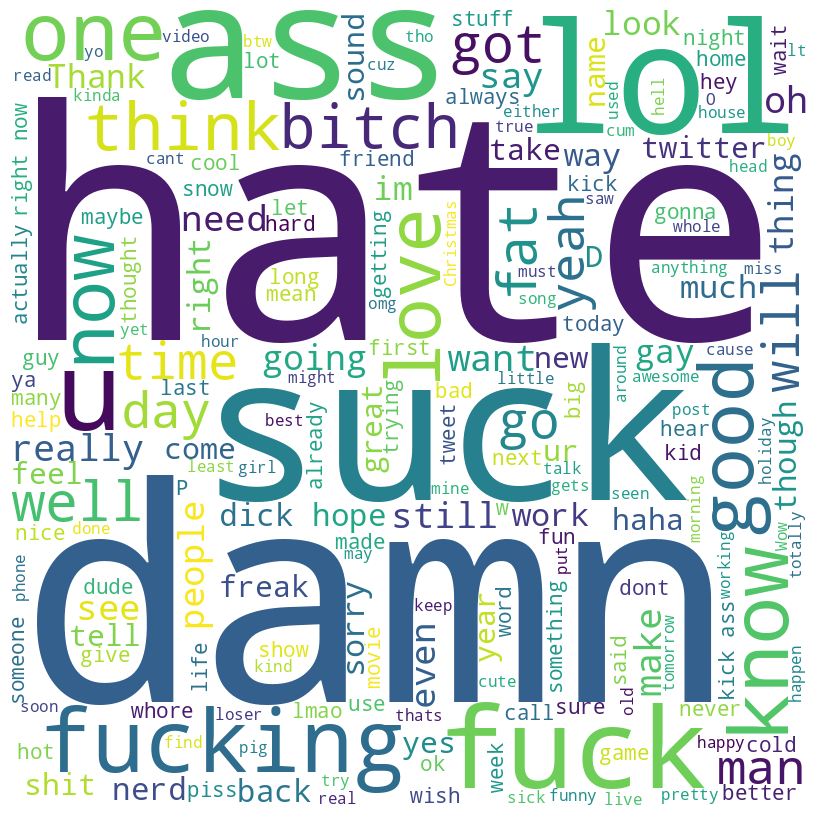

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Exploration
print("Number of rows and columns in the dataset:", df.shape)
print("Summary statistics of numerical columns:\n", df.describe())
print("Information about the dataset:\n", df.info())

# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Examining the distribution of the data
print("Distribution of labels:\n", df['label'].value_counts())

# Identifying relationships between variables
cyberbullying_tweets = df[df['label'] == 1]['content']
non_cyberbullying_tweets = df[df['label'] == 0]['content']
print("Most frequent words in cyberbullying tweets:\n", cyberbullying_tweets.str.split(expand=True).stack().value_counts()[:10])
print("Most frequent words in non-cyberbullying tweets:\n", non_cyberbullying_tweets.str.split(expand=True).stack().value_counts()[:10])

# Visualizing the data
plt.hist(df['content'].str.len(), bins=50)
plt.title('Distribution of tweet lengths')
plt.xlabel('Length of tweet')
plt.ylabel('Frequency')
plt.show()

cyberbullying_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = STOPWORDS, min_font_size = 10).generate(' '.join(cyberbullying_tweets))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cyberbullying_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

non_cyberbullying_wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = STOPWORDS, min_font_size = 10).generate(' '.join(non_cyberbullying_tweets))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(non_cyberbullying_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
# Count the number of occurrences of each label
label_counts = df['label'].value_counts()

# Print the results
print(label_counts)

1    4000
0    4000
Name: label, dtype: int64


In [ ]:
#removing annotation and unamed column from dataframe
df.drop('annotation', axis=1, inplace=True)
df

,Unnamed: 0,content,label
0,1,Get fucking real dude.,1
1,2,She is as dirty as they come and that crook ...,1
2,3,why did you fuck it up. I could do it all day...,1
3,4,Dude they dont finish enclosing the fucking s...,1
4,5,WTF are you talking about Men? No men thats n...,1
...,...,...,...
7995,7996,It sucks but at least my car wasn't stolen. ri...,0
7996,7997,It may even suck ass.,0
7997,7998,just because of a dang song. Over it now but d...,0
7998,7999,I dunno I hate it though. Someone at work ga...,0


In [ ]:
#Pre-processing 
#Converting dataset to lowercase letters
df['content'] = df['content'].apply(lambda x: " ".join(x.lower () for x in x.split()))
#Removing Puncuation from dataset
df['content'] = df['content'].str.replace('[^\w\s]','')

def removeSpecialCharacter(v):
    c = "".join([r for r in v if ('A' <= r <= 'Z') or ('a' <= r <= 'z') or (r == " ")])
    return c

df['content']= df['content'].apply(lambda x: removeSpecialCharacter (str(x)))
df['content'].replace('', np.nan, inplace=True)

df.dropna(subset=['content'], inplace=True)

#removing numbers from text
def remove_digits(txt):
    txt_nodigit = "".join([char for char in txt if not char.isdigit()])
    return txt_nodigit


df['content'] = df['content'].apply(lambda x: remove_digits(x))
df


<ipython-input-8-b8f3e9d99886>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')


,Unnamed: 0,content,label
0,1,get fucking real dude,1
1,2,she is as dirty as they come and that crook re...,1
2,3,why did you fuck it up i could do it all day t...,1
3,4,dude they dont finish enclosing the fucking sh...,1
4,5,wtf are you talking about men no men thats not...,1
...,...,...,...
7995,7996,it sucks but at least my car wasnt stolen righ...,0
7996,7997,it may even suck ass,0
7997,7998,just because of a dang song over it now but da...,0
7998,7999,i dunno i hate it though someone at work gave ...,0


In [ ]:
#Feature Extraction
#Tf-idf Transformer
#tfidf = TfidfTransformer()
clf = CountVectorizer()
fb  =  clf.fit_transform(df['content'])

tf_transformer = TfidfTransformer(use_idf=True).fit(fb)
X_tf = tf_transformer.transform(fb)
X_tf

<7996x12077 sparse matrix of type '<class 'numpy.float64'>'
	with 101998 stored elements in Compressed Sparse Row format>

In [ ]:
#Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_tf, df['label'], test_size=0.30, stratify=df['label'], random_state=42)

In [ ]:
Y_train.value_counts()

0    2800
1    2797
Name: label, dtype: int64

In [ ]:
#Machine Learning Algorithms 
#Support Vector Machine (SVM)
sv_clf = svm.SVC()
sv_clf.fit(X_train, Y_train)

SVC()

In [ ]:
#Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
#XGBoost
xg_clf = XGBClassifier()
xg_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#Multi-layer-network
mln_clf = MLPClassifier()
mln_clf.fit(X_train, Y_train)

MLPClassifier()

In [ ]:
#Performance Evaluation

#Support vector machine
sv_pred = sv_clf.predict(X_test)
print('Classification Report for Support Vector Machine:\n',classification_report(Y_test, sv_pred))

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      1200
           1       0.76      0.69      0.72      1199

    accuracy                           0.74      2399
   macro avg       0.74      0.74      0.74      2399
weighted avg       0.74      0.74      0.74      2399



In [ ]:
# Predict labels for the training set
train_pred = sv_clf.predict(X_train)

# Print the classification report
print('Classification Report for Support Vector Machine (Training Set):\n', classification_report(Y_train, train_pred))

Classification Report for Support Vector Machine (Training Set):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2800
           1       0.99      0.97      0.98      2797

    accuracy                           0.98      5597
   macro avg       0.98      0.98      0.98      5597
weighted avg       0.98      0.98      0.98      5597



In [ ]:
#Multi-layer-network
mln_pred = mln_clf.predict(X_test)
print('Classification Report for Multi-Layer-Network:\n',classification_report(Y_test, mln_pred))

Classification Report for Multi-Layer-Network:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67      1200
           1       0.67      0.74      0.70      1199

    accuracy                           0.69      2399
   macro avg       0.69      0.69      0.69      2399
weighted avg       0.69      0.69      0.69      2399



In [ ]:
# Predict labels for the training set
train_predd = mln_clf.predict(X_train)

# Print the classification report
print('Classification Report for Multi Layer Network (Training Set):\n', classification_report(Y_train, train_predd))

Classification Report for Multi Layer Network (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2800
           1       1.00      1.00      1.00      2797

    accuracy                           1.00      5597
   macro avg       1.00      1.00      1.00      5597
weighted avg       1.00      1.00      1.00      5597



In [ ]:
#Naive bayes
nb_pred = nb_clf.predict(X_test)
print('Classification Report for Naive Bayes:\n',classification_report(Y_test, nb_pred))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      1200
           1       0.69      0.68      0.69      1199

    accuracy                           0.69      2399
   macro avg       0.69      0.69      0.69      2399
weighted avg       0.69      0.69      0.69      2399



In [ ]:
# Predict labels for the training set
train_pre = nb_clf.predict(X_train)

# Print the classification report
print('Classification Report for Naive Bayes (Training Set):\n', classification_report(Y_train, train_pre))

Classification Report for Naive Bayes (Training Set):
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      2800
           1       0.92      0.88      0.90      2797

    accuracy                           0.90      5597
   macro avg       0.90      0.90      0.90      5597
weighted avg       0.90      0.90      0.90      5597



In [ ]:
#XGBoost
xg_pred = xg_clf.predict(X_test)
print('Classification Report for XGBOOST:\n',classification_report(Y_test, xg_pred))

Classification Report for XGBOOST:
               precision    recall  f1-score   support

           0       0.67      0.66      0.67      1200
           1       0.67      0.68      0.67      1199

    accuracy                           0.67      2399
   macro avg       0.67      0.67      0.67      2399
weighted avg       0.67      0.67      0.67      2399



In [ ]:
# Predict labels for the training set
train_pr = xg_clf.predict(X_train)

# Print the classification report
print('Classification Report for XGBoost (Training Set):\n', classification_report(Y_train, train_pr))

Classification Report for XGBoost (Training Set):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2800
           1       0.87      0.87      0.87      2797

    accuracy                           0.87      5597
   macro avg       0.87      0.87      0.87      5597
weighted avg       0.87      0.87      0.87      5597



In [ ]:
#Voting
from sklearn.ensemble import VotingClassifier

# Defining individual classifiers
sv_clf = svm.SVC()
mln_clf = MLPClassifier()
xg_clf = XGBClassifier()

# Create a voting classifier with the defined classifiers
voting_clf = VotingClassifier(estimators=[('svm', sv_clf), ('MLP', mln_clf), ('XG', xg_clf)], voting='hard')

# Train the voting classifier on the training data
voting_clf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = voting_clf.predict(X_test)

# Evaluate the performance of the voting classifier
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Predict labels for the training set
tr_pred = voting_clf.predict(X_train)

# Print the classification report
print('Classification Report for Voting Classifier (Training Set):\n', classification_report(Y_train, tr_pred))

# Predict labels for the test set
te_pred = voting_clf.predict(X_test)

# Print the classification report for the test set
print('Classification Report for Voting Classifier (Test Set):\n', classification_report(Y_test, te_pred))

Accuracy: 0.7382242601083785
Classification Report for Voting Classifier (Training Set):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2800
           1       0.99      0.98      0.99      2797

    accuracy                           0.99      5597
   macro avg       0.99      0.99      0.99      5597
weighted avg       0.99      0.99      0.99      5597

Classification Report for Voting Classifier (Test Set):
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1200
           1       0.74      0.74      0.74      1199

    accuracy                           0.74      2399
   macro avg       0.74      0.74      0.74      2399
weighted avg       0.74      0.74      0.74      2399



In [ ]:
## #Ensemble 
from sklearn.ensemble import AdaBoostClassifier

# Creating an AdaBoostClassifier object
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fitting the model to the training data
ada.fit(X_train, Y_train)

# Evaluating the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Predict labels for the training set
adaa_pred = ada.predict(X_train)

# Print the classification report
print('Classification Report for AdaBoost Classifier (Training Set):\n', classification_report(Y_train, adaa_pred))

# Predicting on the test data
Y_pred = ada.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Print the classification report for the test set
print('Classification Report for AdaBoost Classifier (Test Set):\n', classification_report(Y_test, Y_pred))

Accuracy: 0.7382242601083785
Classification Report for AdaBoost Classifier (Training Set):
               precision    recall  f1-score   support

           0       0.65      0.64      0.65      2800
           1       0.65      0.66      0.65      2797

    accuracy                           0.65      5597
   macro avg       0.65      0.65      0.65      5597
weighted avg       0.65      0.65      0.65      5597

Accuracy: 0.6090037515631513
Classification Report for AdaBoost Classifier (Test Set):
               precision    recall  f1-score   support

           0       0.61      0.59      0.60      1200
           1       0.60      0.63      0.62      1199

    accuracy                           0.61      2399
   macro avg       0.61      0.61      0.61      2399
weighted avg       0.61      0.61      0.61      2399

